# <center> Кейс: Анализ оттока клиентов банка

In [70]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

In [71]:
churn_data = pd.read_csv('data/churn.csv')

In [72]:
churn_df = churn_data.copy() # сохраняя оригинальный датасет скопировав датафрейм
churn_df = churn_df.drop('RowNumber', axis=1) # Удаляем столбец не несущий информации
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

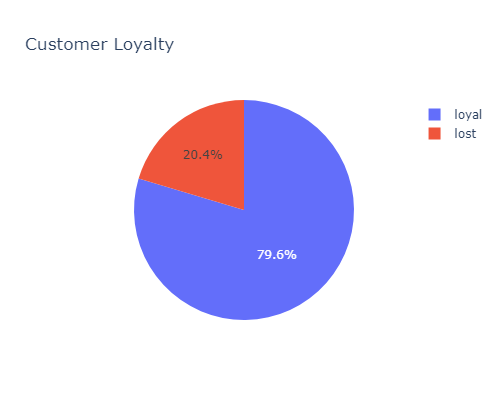

In [73]:
loyalty = churn_data.Exited.value_counts()

fig = px.pie(names=['loyal', 'lost'],
             values=loyalty,
             title='Customer Loyalty',
             width=500,
             height=400,
)
# fig.write_image('data/loyalty.png')
fig.show('png')

- можно утверждать, что примерно каждый пятый клиент прекратил пользоватся услугами банка

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
Опишите распределение и сделайте выводы

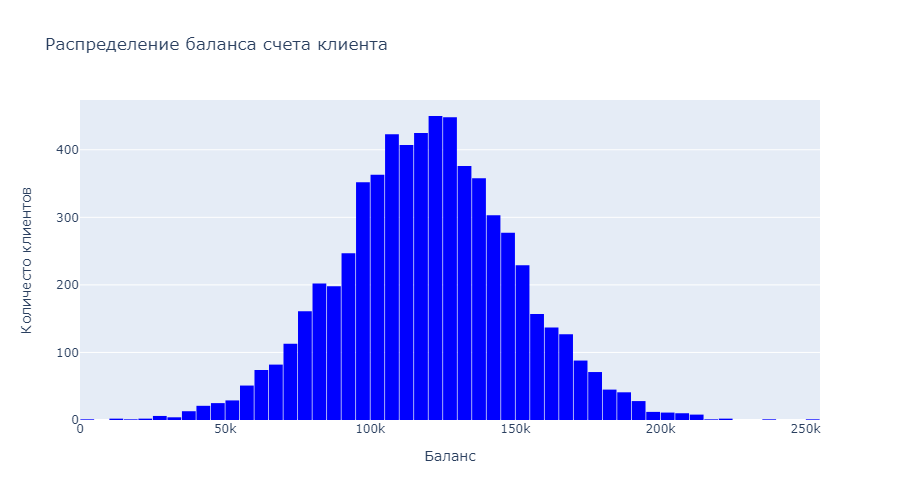

In [74]:
clients_above_2500 = churn_data[churn_data.Balance > 2500] # фильтруем клиентов с балансом больше 2500

fig = px.histogram(clients_above_2500,
                   x='Balance',
                   color_discrete_sequence=['blue'],
                   title='Распределение баланса счета клиента',
                   nbins=100,
                   width=900,
                   height=500                  
)
fig.layout.yaxis.title.text = 'Количесто клиентов'
fig.layout.xaxis.title.text = 'Баланс'
fig.layout.bargap = 0.05
fig.write_image('data/balance.png')
fig.show('png')

- можно утверждать, что распределение балансов похоже на нормальное
- основная часть клиентов имеет на своих счетах сумму от 50 до 180 тысяч
- мода распределения составляет 120-130 тысяч

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

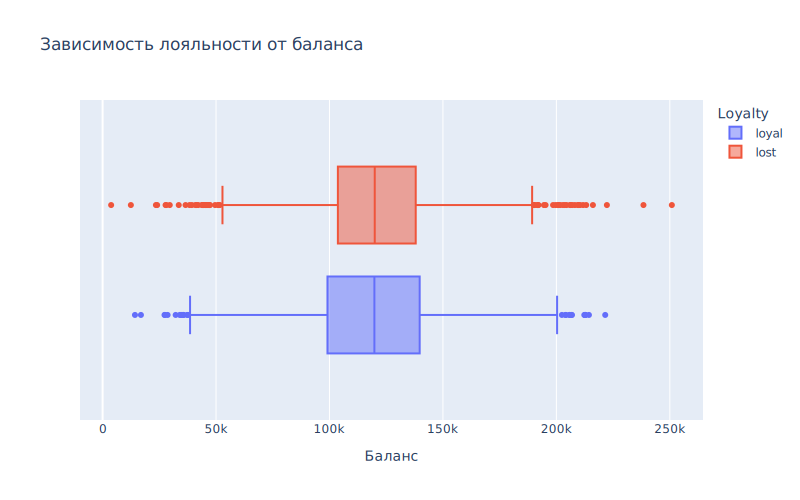

In [75]:
clients_above_2500_loaylty = clients_above_2500.copy() # создаем новый датавфрейм 
clients_above_2500_loaylty['Loyalty'] = clients_above_2500_loaylty.Exited.apply(lambda x: 'loyal' if x==0 else 'lost') # создаем колонку-индикатор лояльности клиента

fig = px.box(clients_above_2500_loaylty, 
             x='Balance',
             color='Loyalty',
             title='Зависимость лояльности от баланса',
             width=800,
             height=500
)
# fig.layout.legend.title = None
fig.layout.xaxis.title.text = 'Баланс'
# fig.write_image('data/loyalty_balance.png')
fig.show('svg')

- можно сказать, медианные значения распределений практически не отличаются
- распределение ушедших клиентов более узкое по сравнению с распределением лояльных
- можно предположить, что уход клиентов имеющих на счете баланс близкий к медианному, \
которых условно можно назвать "средним", связан с тем, конкурнекты нашего банка предлагают более выгодные условия для подобных счетов
- интересно отметить, что аномальные выбросы у ушедших клиентов расположены шире, чем у лояльных

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?\
 На какую возрастную категорию клиентов стоит обратить внимание банку?

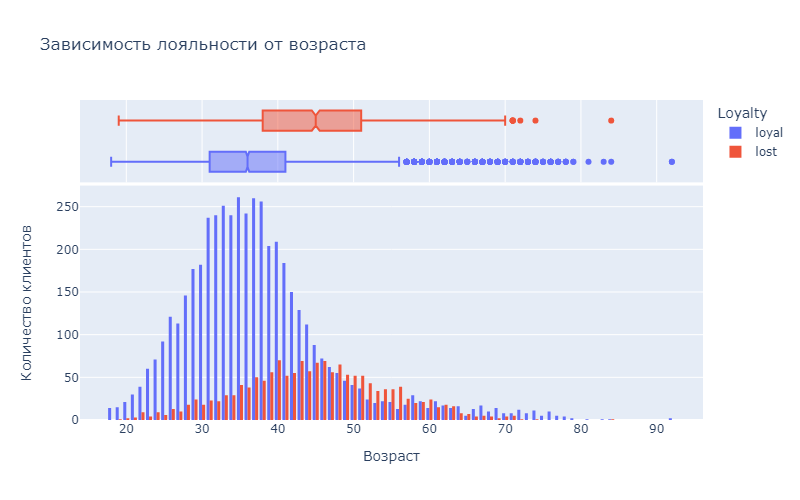

In [76]:
fig = px.histogram(clients_above_2500_loaylty,
                   x='Age',
                   title='Зависимость лояльности от возраста',
                   color='Loyalty',
                   barmode='group',
                   marginal='box',
                   nbins=100,
                   width=800,
                   height=500                  
)
fig.layout.yaxis.title.text = 'Количество клиентов'
fig.layout.xaxis.title.text = 'Возраст'
# fig.layout.legend.title = None
# fig.write_image('data/loyalty_age.png')
fig.show('png')

- наблюдаются значительные возрастные отличия между группами лояльных и нелояльных клиентов. \
 Мода распределения лояльных клиентов банка составляют люди в возрасте 30-40 лет. \
 Эта возрастная категория формирует наиболее многочисленную группу надежных клиентов
- чаще всего уходять клиенты в возрастной категории от 40 до 50 лет

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [77]:
fig = px.scatter(clients_above_2500_loaylty,
                 x='EstimatedSalary',
                 y='CreditScore',
                 color='Loyalty',
                 labels={'EstimatedSalary': 'Предполагаемая заработная плата', 'CreditScore': 'Кредитный рейтинг'},
                 title='Взаимосвязь кредитного рейтинга и заработной платы',
                 height=400                
)
# fig.layout.legend.title = None
fig.write_image('data/scores.png')
fig.show()

- интересно отметить, что все клиенты с кредитным рейтингом менее 400 покинули банк.
- в целом можно утверждать, что закономерности между признаками не наблюдается

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [78]:
by_gender = clients_above_2500_loaylty.groupby('Gender', as_index=False).Exited.mean() # группируем по гендерному признаку
by_gender['Exited'] = by_gender.Exited * 100

fig = px.bar(by_gender,
             x='Gender',
             y='Exited',
             color='Gender',
             color_discrete_map={'Female': 'Red', 'Male': 'Blue'},
             labels={'Exited': 'Ушедшие, %', 'Gender' : 'Гендерный признак'},
            #  labels={'EstimatedSalary': 'Предполагаемая заработная плата', 'CreditScore': 'Кредитный рейтинг'},
             title=' Доля ушедших клиентов среди мужчин и женщин',
             width=500,
             height=500 
)
fig.update_layout(showlegend=False)
fig.update_xaxes(tickangle=30)
fig.write_image('data/gender.png')
fig.show()

- можно сказать, что женщины гораздо чаще покидают банк: 30% процентов женщин-клиентов ушли из банка, \
против 20% ушедших клиентов-мужчин

yes thats right
